In [14]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

- 기준년도 이전의 전과정보를 기준으로 기준년도에 발생한 범죄의 범죄자 수?
- 전과없음 : 초범
- 전과있음 : 재범

In [2]:
# 라이브러리 import
import pandas as pd

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 데이터 불러오기
df = pd.read_csv('./Data/11_성인 대비 소년 재범률 비교.csv', encoding='cp949') 
df.fillna(0, inplace=True)
df.head()

,전과별(1),전과별(2),2019,2019.1
0,전과별(1),전과별(2),성인,소년
1,전과별(1),전과별(2),계,계
2,전과있음,소계,695998,21457
3,전과있음,1범,151044,6681
4,전과있음,2범,104976,3360


In [8]:
# 컬럼, 및 계 항목 정리
df = df.drop(columns=['전과별(1)'])
df = df[3:]
df

,전과별(2),2019,2019.1
3,1범,151044,6681
4,2범,104976,3360
5,3범,78114,2517
6,4범,58702,1597
7,5범,47336,1228
8,6범,36425,988
9,7범,29726,724
10,8범,23252,604
11,9범이상,166423,3758


# 범죄자수 비교

In [32]:
df.columns = ['전과', '성인', '소년']
df['성인'] = df['성인'].str.replace(',', '').astype(int)
df['소년'] = df['소년'].str.replace(',', '').astype(int)

df

,전과,성인,소년
3,1범,151044,6681
4,2범,104976,3360
5,3범,78114,2517
6,4범,58702,1597
7,5범,47336,1228
8,6범,36425,988
9,7범,29726,724
10,8범,23252,604
11,9범이상,166423,3758


In [26]:
df_graph = df[1:].melt('전과')

In [33]:
df_graph.columns = ['전과', '구분', '범죄자수']
df_graph

,전과,구분,범죄자수
0,2범,성인,104976
1,3범,성인,78114
2,4범,성인,58702
3,5범,성인,47336
4,6범,성인,36425
5,7범,성인,29726
6,8범,성인,23252
7,9범이상,성인,166423
8,2범,소년,3360
9,3범,소년,2517


In [34]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전과      16 non-null     object
 1   구분      16 non-null     object
 2   범죄자수    16 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 448.0+ bytes


In [35]:
# 그래프 그리기

fm = mp.font_manager.FontManager()
#한글 지원하는 폰트명으로 재할당
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='전과', ylabel='범죄자수'>

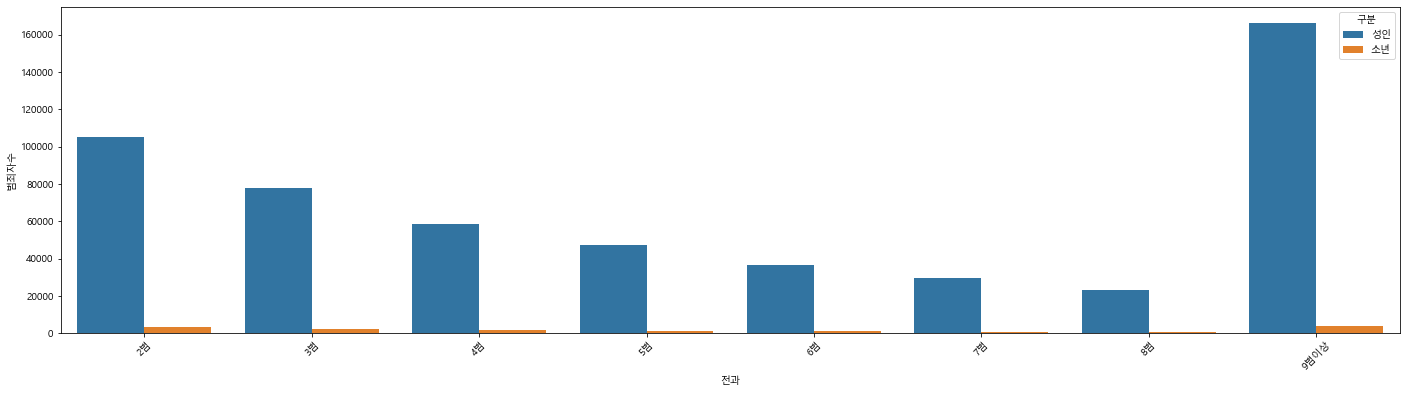

In [36]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=45)
sns.barplot(data=df_graph, x='전과',y ='범죄자수', hue='구분')

# 재범률 비교

In [37]:
count_old = df['성인'].sum()
count_young = df['소년'].sum()

print(count_old, count_young)

695998 21457


In [62]:
s_old = df['성인'] / count_old * 100
s_young = df['소년'] / count_young * 100

df_grapg2 = df[['전과']].copy()
df_grapg2['성인'] = s_old
df_grapg2['소년'] = s_young

df_grapg2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 3 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전과      9 non-null      object 
 1   성인      9 non-null      float64
 2   소년      9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 348.0+ bytes


In [63]:
df_graph2 = df_grapg2.melt('전과')
df_graph2.columns = ['전과', '구분', '범죄자수']
df_graph2

,전과,구분,범죄자수
0,1범,성인,21.701786
1,2범,성인,15.082802
2,3범,성인,11.223308
3,4범,성인,8.434220
4,5범,성인,6.801169
5,6범,성인,5.233492
6,7범,성인,4.270989
7,8범,성인,3.340814
8,9범이상,성인,23.911419
9,1범,소년,31.136692


<AxesSubplot:xlabel='전과', ylabel='범죄자수'>

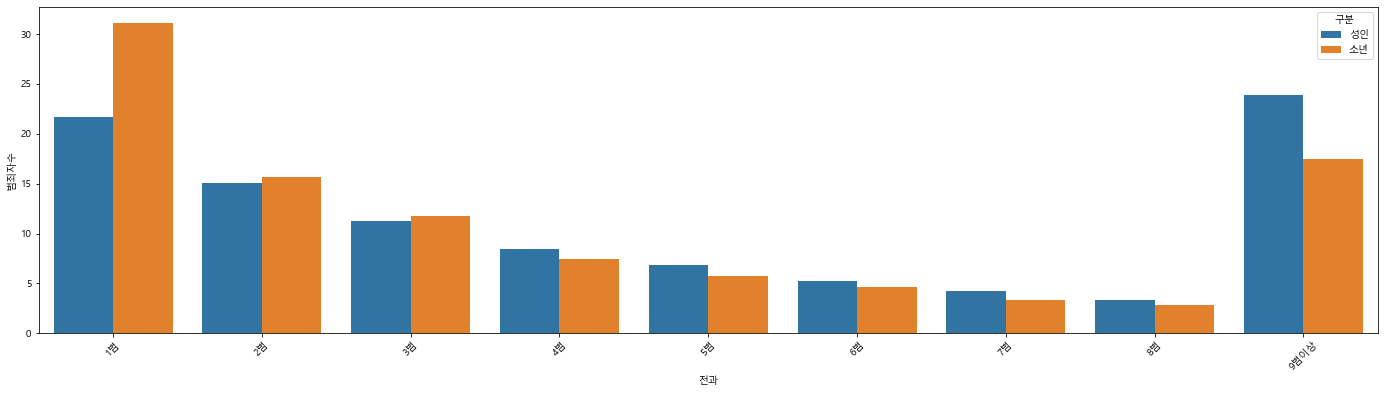

In [64]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=45)
sns.barplot(data=df_graph2, x='전과',y ='범죄자수', hue='구분')

In [ ]:
# 비율로 보았을 때 소년범죄는 초범 비율이 높고 재범 비율은 성인에 비해 낮아보인다.
# 분석이 잘못된걸까?

In [5]:
# 데이터 불러오기
df = pd.read_csv('./Data/11_성인 대비 소년 재범률 비교_2.csv', encoding='cp949') 
df.fillna(0, inplace=True)
df.head()

,전과별(1),전과별(2),2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,전과별(1),전과별(2),소년,소년,소년,소년,소년,소년,소년,소년,소년,소년,소년,소년,소년,소년
1,전과별(1),전과별(2),계,계,계,계,계,계,계,계,계,계,계,계,계,계
2,합계,소계,69012,87798,134340,112685,89580,102162,107452,91573,77567,71034,76000,72754,66135,66243
3,전과있음,소계,19975,25522,35399,36571,31521,37238,40200,38039,29652,27055,26260,24040,22308,21457
4,전과있음,1범,9185,11531,15470,15095,12086,13635,14402,12385,9853,8636,8444,8039,7164,6681


In [50]:
# 재범합계와 초범합계만 추출
df_result = pd.concat([df[2:3], df[3:4]]) # , df[13:14] : 초범

# 컬럼 정리
df_result = df_result.drop(columns=['전과별(1)', '전과별(2)'])

# 숫자형으로 변경
df_result = df_result.astype(int)

# 분류컬럼 추가
# df_result['전과분류'] = ['합계', '재범']

df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 2 to 3
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2006    2 non-null      int32
 1   2007    2 non-null      int32
 2   2008    2 non-null      int32
 3   2009    2 non-null      int32
 4   2010    2 non-null      int32
 5   2011    2 non-null      int32
 6   2012    2 non-null      int32
 7   2013    2 non-null      int32
 8   2014    2 non-null      int32
 9   2015    2 non-null      int32
 10  2016    2 non-null      int32
 11  2017    2 non-null      int32
 12  2018    2 non-null      int32
 13  2019    2 non-null      int32
dtypes: int32(14)
memory usage: 244.0 bytes


In [60]:
df_graph = pd.DataFrame(df_result.iloc[1] / df_result.iloc[0] * 100)
# df_graph.columns = ['년도', '재범자 비율']
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2006 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14 non-null     float64
dtypes: float64(1)
memory usage: 780.0+ bytes


No handles with labels found to put in legend.


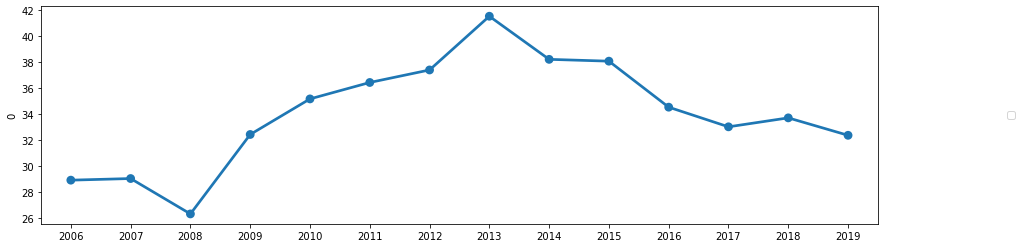

In [62]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_graph, x=df_graph.index, y=0)

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)